<span style="color:green">**Поздравляю, твой проект принят!**</span>

Константин, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Новые комментарии имеют метку `v2`.

<span style="color:purple">**Привет, Константин!**</span>

Меня зовут **Василий** и я - ревьювер, буду проверять твой проект.

Если не против, я буду обращаться к тебе на "ТЫ". Если это неприемлемо, обязательно напиши мне в комментариях – мы прейдем на "ВЫ".

Спасибо, что прислал проект, вижу, что ты хорошо постарался над ним. В тетради ты сможешь найти мои комментарии. Пострайся учесть их в ходе исправления этого и выполнения дальнейших проектов.

Обрати внимание, я буду выделять свои комментарии цветом, в зависимости от того, какие действия, важность и особенности тебя ждут в процессе проверки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Такими комментариями я буду помечать хорошо проделаную работу, а так же хорошо проделаную работу над ошибками.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
После таких комментариев ничего исправлять не нужно, но я дам рекомендации на будущее и подскажу, что можно улучшить.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Если ты видишь такой комментарий, значит я указываю тебе на недочёт, его нужно исправить. Без такого исправления я не приму твою работу:)
</div>

**Пожалуста, не удаляй мои комментарии. При повторной проверке, я буду ориентироваться на них.**

<span style="color:blue"> Можешь под моими комментариями оставлять свои, в которых опиши свои исправления. Это облегчит процесс проверки и мне, и тебе:) Например, вот так:</span>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
</div>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Хорошее введение, понятно чему посвящен твой проект и какие этапы он содержит👍
</div>

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# загружаем библиотеку пандас
import pandas as pd
# загрузим библиотеки для визуализаций
import matplotlib.pyplot as plt
import seaborn as sns
# загружаем библиотеки для стат тестов
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from math import ceil
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Все используемые библиотеки лучше импортировать в первой ячейке согласно PEP8. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

In [2]:
# загрузим датафрейм с историческими данными
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [3]:
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
# проведем группировку по стоблцу user_id и посчитаем кол-во уникальных сессий для каждого пользователя
groped = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()

In [5]:
# найдем пользователя с наибольшим числом уникальных сессий и выдедем для него информацию из таблицы с историческими данными
max_sessions = groped['session_id'].max()
target_user = groped[groped['session_id'] == max_sessions].iloc[0]['user_id']
display(sessions_history[sessions_history['user_id'] == target_user])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Пользователь с наибольшим количеством сессий определен корректно, все сессии этого пользователя выведены на экран👍
</div>

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [6]:
# Преобразуем дату в правильный формат
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

In [7]:
# Агрегируем данные по дням
daily_stats = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),  # Общее число уникальных пользователей
    registered_users=('registration_flag', lambda x: (x == 1).sum())  # Число зарегистрированных
).reset_index()

# Рассчитываем долю зарегистрированных пользователей
daily_stats['registration_rate'] = daily_stats['registered_users'] / daily_stats['total_users']

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Данные для графиков собраны оптимальным способом👍
</div>

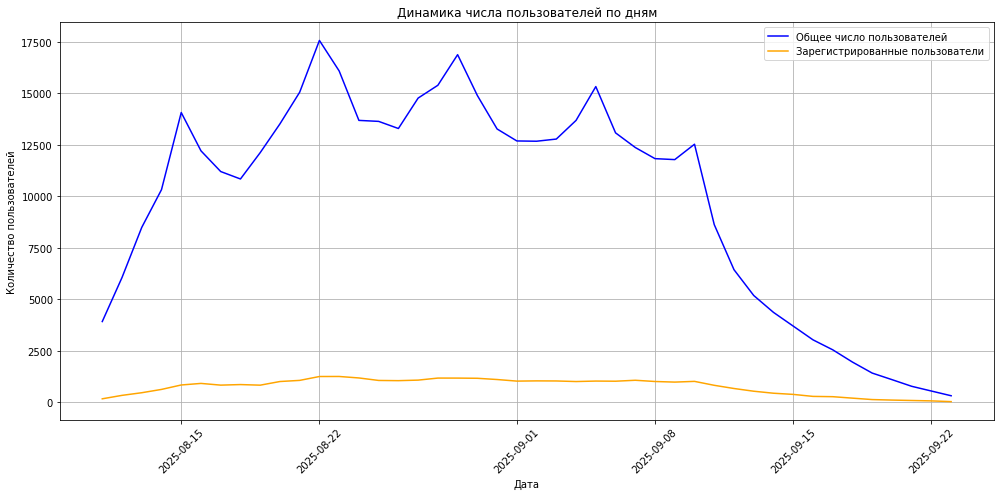

In [8]:
# График 1: Общее число пользователей и зарегистрированных
plt.figure(figsize=(14, 7))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], label='Общее число пользователей', color='blue')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], label='Зарегистрированные пользователи', color='orange')

plt.title('Динамика числа пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

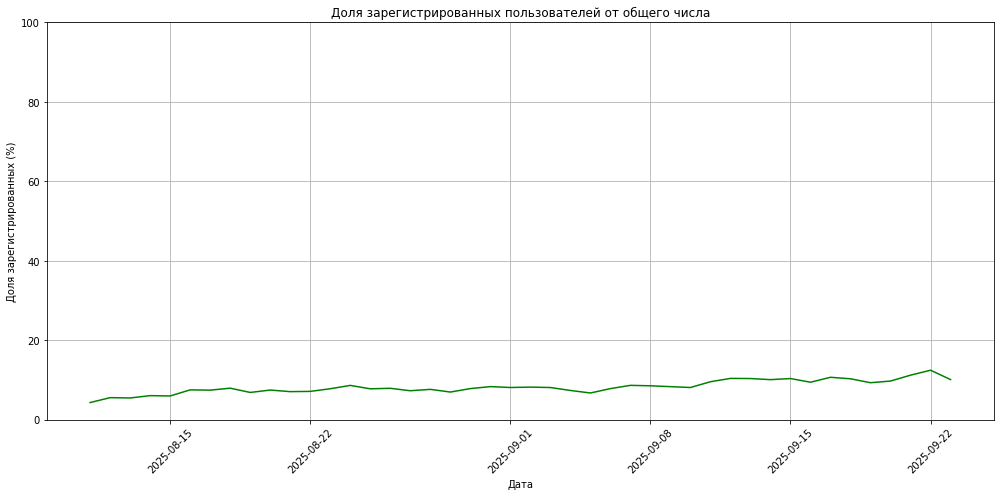

In [9]:
# График 2: Доля зарегистрированных пользователей
plt.figure(figsize=(14, 7))
plt.plot(daily_stats['session_date'], daily_stats['registration_rate'] * 100, color='green')

plt.title('Доля зарегистрированных пользователей от общего числа')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных (%)')
plt.grid(True)
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100%
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Графики построены корректно👍
</div>

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [10]:
# сгруппируем данные по кол-ву просмотренных страниц и посчитаем кол-во уникальных сессий
page_sessions = sessions_history.groupby('page_counter').agg(
    session_count=('session_id', 'nunique')
).reset_index()
# Сортируем по количеству просмотренных страниц
page_sessions = page_sessions.sort_values('page_counter')
# посмотрим полученный результат
display(page_sessions)

,page_counter,session_count
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


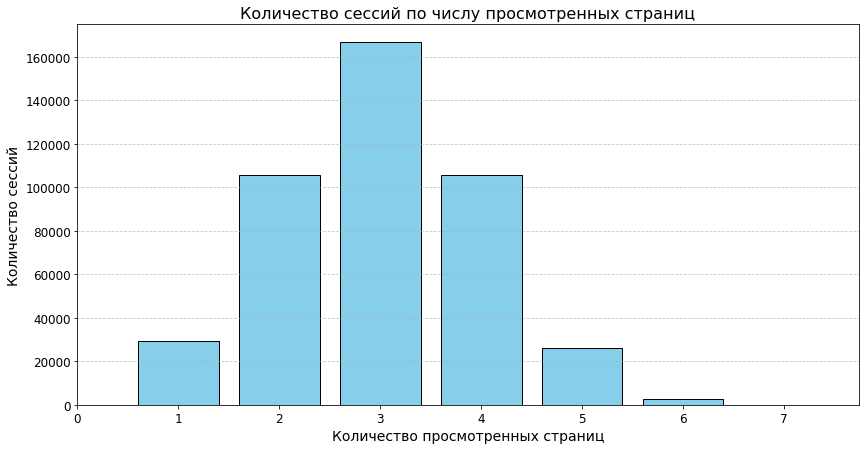

In [11]:
# Строим столбчатую диаграмму
plt.figure(figsize=(14, 7))
plt.bar(
    page_sessions['page_counter'],
    page_sessions['session_count'],
    color='skyblue',
    edgecolor='black'
)

# Оформляем график
plt.title('Количество сессий по числу просмотренных страниц', fontsize=16)
plt.xlabel('Количество просмотренных страниц', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(left=0)  # Устанавливаем начало оси X в 0
plt.ylim(bottom=0)  # Устанавливаем начало оси Y в 0
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Данные собраны оптимальным способом, график наглядно демонстрирует распределение сессий в порядке количества просмотренных страниц👍
    
Здорово, что уделяешь внимание оформлению графиков.
    
Предлагаю изучить интересные методы по визуализации. Прикрепляю несколько интересных ссылок:
   
https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
</div>
</div>

Для 3х страниц было проведено наибольшее кол-во сессий(166690). Для 7ми наменьшее число сессий всего 92 

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

In [12]:
# Создаем новый столбец good_session
sessions_history['good_session'] = sessions_history.apply(
    lambda row: 1 if row['page_counter'] >= 4 else 0, axis=1)

In [13]:
# Агрегируем данные по дням
daily_good_sessions = sessions_history.groupby('session_date').agg(
    total_sessions=('session_id', 'nunique'),  # Общее число сессий
    good_sessions=('good_session', 'sum')      # Число успешных сессий
).reset_index()

# Рассчитываем долю успешных сессий
daily_good_sessions['success_rate'] = daily_good_sessions['good_sessions'] / daily_good_sessions['total_sessions']

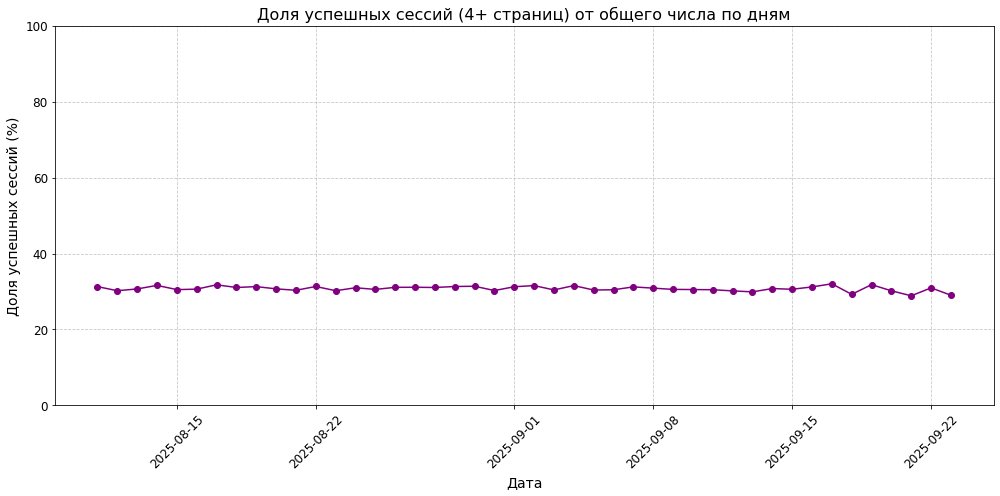

In [14]:
# Строим график
plt.figure(figsize=(14, 7))
plt.plot(
    daily_good_sessions['session_date'],
    daily_good_sessions['success_rate'] * 100,
    marker='o',
    linestyle='-',
    color='purple'
)

# Оформляем график
plt.title('Доля успешных сессий (4+ страниц) от общего числа по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Доля успешных сессий (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100%
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Всё верно👍
</div>

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Сформулируйте нулевую и альтернативную гипотезы:






В данном случае наиболее подходящей метрикой будет показатель вовлеченности пользователей, который мы будем измеряться через:
- долю успешных сессий - 4 и более просмотренных страниц за сессию(Чем более интересный контент тем больше пользователь будет смотреть страниц)

H₀: доля успешных сессий в тестовой группе не превышает долю в контрольной группе.

H₁: доля успешных сессий в тестовой группе статистически значимо выше, чем в контрольной группе.


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Гипотезы верно сформулированы👍
</div>

#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [15]:

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.009  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
  
mde равен 3% относительного базового уровня доли. 
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Принято👍
</div>

Общий размер групп для проведения теста составляет 82080

#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [16]:
total_size = 2*sample_size
# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = daily_stats['total_users'].median() # используем данные из предыдущих задач

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(total_size / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 12161.5 пользователей в день составит 7 дней


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**

`test_duration = ceil(7552 / avg_daily_users)`    
    
Ручной ввод значений нужно исключить. Такой код неустойчив к ошибочным расчётам.
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Принято👍
</div>

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [17]:
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [18]:
# изучим первые строки таблицы
sessions_test_part.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [19]:
# В данной таблице представлены данные за 1 день наблюдений таким образом доп. фильтрация для одного дня не требуется проведем подсчет кол-ва уникальных пользователей для двух групп
unique_users_A = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].nunique()
unique_users_B = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].nunique()

In [20]:
# подсчитаем процентную разницу по формуле
percentage_diff = 100 * abs(unique_users_A - unique_users_B) / unique_users_A

# Выводим результаты
display(f"Количество уникальных пользователей в группе A: {unique_users_A}")
display(f"Количество уникальных пользователей в группе B: {unique_users_B}")
display(f"Процентная разница между группами: {percentage_diff:.2f}%")

'Количество уникальных пользователей в группе A: 1477'

'Количество уникальных пользователей в группе B: 1466'

'Процентная разница между группами: 0.74%'

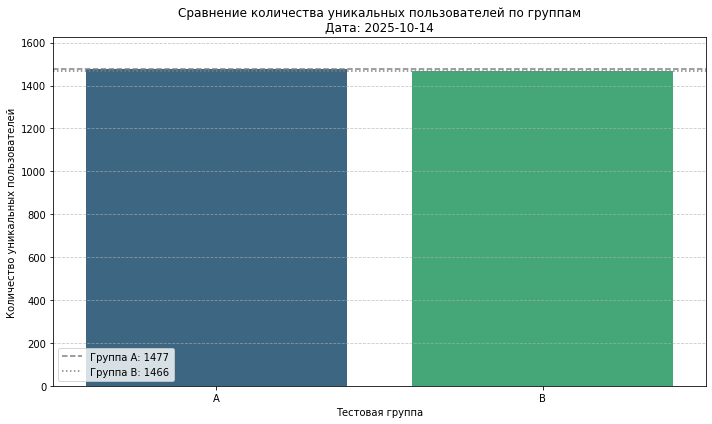

In [21]:
# Создаем сводную таблицу для визуализации
group_stats = pd.DataFrame({
    'Группа': ['A', 'B'],
    'Уникальные пользователи': [unique_users_A, unique_users_B]
})

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Группа',
    y='Уникальные пользователи',
    data=group_stats,
    palette='viridis')
plt.title(f'Сравнение количества уникальных пользователей по группам\nДата: 2025-10-14')
plt.xlabel('Тестовая группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(group_stats['Уникальные пользователи']) * 1.1)
plt.tight_layout()

# Добавляем линию разницы
plt.axhline(y=unique_users_A, color='gray', linestyle='--', label=f'Группа A: {unique_users_A}')
plt.axhline(y=unique_users_B, color='gray', linestyle=':', label=f'Группа B: {unique_users_B}')
plt.legend()

plt.show()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Расчёт верный👍

</div>

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [22]:
# Создаем отдельные множества пользователей для каждой группы
users_A = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'])
users_B = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'])

# Находим пересечение множеств (пользователей, которые есть в обеих группах)
common_users = users_A.intersection(users_B)

# Выводим результаты
if common_users:
    print(f"Найдено {len(common_users)} пользователей, которые присутствуют в обеих группах:")
    print(common_users)
    
    # Дополнительно можно вывести статистику по этим пользователям
    common_df = df[df['user_id'].isin(common_users)]
    print("\nСтатистика по общим пользователям:")
    print(common_df.groupby(['user_id', 'test_group']).size().reset_index(name='count'))
else:
    print("Пересечения пользователей между группами A и B не обнаружено.")

# Проверяем общее количество уникальных пользователей в каждой группе
total_unique_A = len(users_A)
total_unique_B = len(users_B)

print(f"\nОбщее количество уникальных пользователей в группе A: {total_unique_A}")
print(f"Общее количество уникальных пользователей в группе B: {total_unique_B}")

# Рассчитываем процент пересечения (если есть)
if total_unique_A > 0 and total_unique_B > 0:
    intersection_percentage = (len(common_users) / min(total_unique_A, total_unique_B)) * 100
    print(f"\nПроцент пересечения групп: {intersection_percentage:.2f}%")
else:
    print("\nПроцент пересечения групп: 0%")

Пересечения пользователей между группами A и B не обнаружено.

Общее количество уникальных пользователей в группе A: 1477
Общее количество уникальных пользователей в группе B: 1466

Процент пересечения групп: 0.00%


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Здорово, что проверил пересечение групп. Такая проверка была необходима, так как могут быть ошибки при логировании пользователей по группам. 

</div>

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


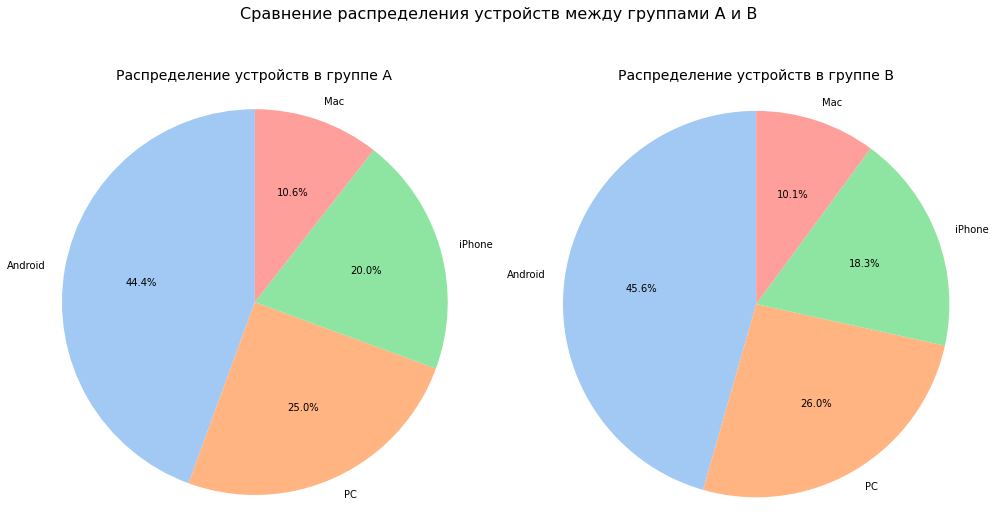

Распределение устройств в группе A (по уникальным пользователям):
    device  user_count  device_percentage
0  Android   44.414353          44.414353
1       PC   24.983074          24.983074
2   iPhone   20.040623          20.040623
3      Mac   10.561950          10.561950

Распределение устройств в группе B (по уникальным пользователям):
    device  user_count  device_percentage
0  Android   45.566166          45.566166
1       PC   25.989086          25.989086
2   iPhone   18.349250          18.349250
3      Mac   10.095498          10.095498


In [23]:
group_A = sessions_test_part[sessions_test_part['test_group'] == 'A']
group_B = sessions_test_part[sessions_test_part['test_group'] == 'B']
# Группируем по пользователям и устройствам для корректного подсчета
device_A = group_A.groupby('user_id').agg(
    device=('device', 'first')  # Берем первое значение устройства для пользователя
).reset_index()

device_B = group_B.groupby('user_id').agg(
    device=('device', 'first')
).reset_index()

# Считаем долю устройств для уникальных пользователей
device_counts_A = device_A['device'].value_counts(normalize=True) * 100
device_counts_B = device_B['device'].value_counts(normalize=True) * 100

# Создаем DataFrame с результатами
device_stats_A = pd.DataFrame({
    'device': device_counts_A.index,
    'user_count': device_counts_A.values,
    'device_percentage': device_counts_A.values
}).reset_index(drop=True)

device_stats_B = pd.DataFrame({
    'device': device_counts_B.index,
    'user_count': device_counts_B.values,
    'device_percentage': device_counts_B.values
}).reset_index(drop=True)

# Визуализация
plt.figure(figsize=(14, 7))

# Группа A
plt.subplot(1, 2, 1)
plt.pie(
    device_stats_A['device_percentage'],
    labels=device_stats_A['device'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Распределение устройств в группе A', fontsize=14)
plt.axis('equal')

# Группа B
plt.subplot(1, 2, 2)
plt.pie(
    device_stats_B['device_percentage'],
    labels=device_stats_B['device'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Распределение устройств в группе B', fontsize=14)
plt.axis('equal')

plt.suptitle('Сравнение распределения устройств между группами A и B', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Выводим табличные данные
print("Распределение устройств в группе A (по уникальным пользователям):")
print(device_stats_A)
print("\nРаспределение устройств в группе B (по уникальным пользователям):")
print(device_stats_B)

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Расчёт долей распределения устройств по группам выполнен по сессиям, то есть по каждой строке, а не по уникальным пользователям, что требуется по заданию. Исправь расчёты.


</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Верно👍
</div>

можно сделать вывод что распределение по устройствам в группах приверно одинаковое

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


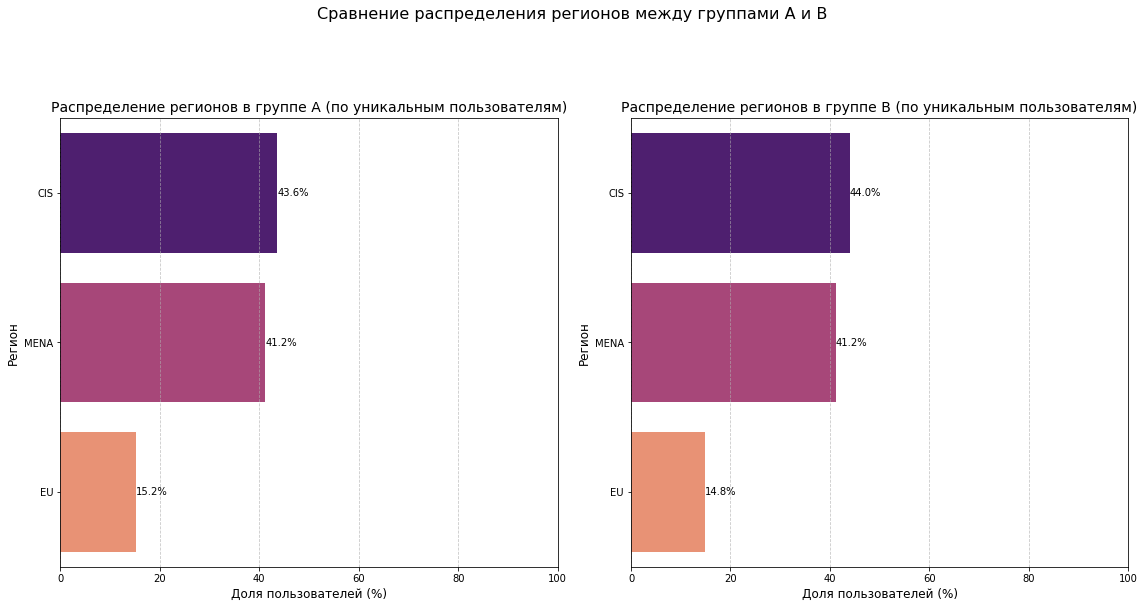

Распределение регионов в группе A (по уникальным пользователям):
  region  user_count  region_percentage
0    CIS   43.601896          43.601896
1   MENA   41.232227          41.232227
2     EU   15.165877          15.165877

Распределение регионов в группе B (по уникальным пользователям):
  region  user_count  region_percentage
0    CIS   43.997271          43.997271
1   MENA   41.200546          41.200546
2     EU   14.802183          14.802183


In [24]:
# Группируем по пользователям и регионам для корректного подсчета
region_A = group_A.groupby('user_id').agg(
    region=('region', 'first')  # Берем первое значение региона для пользователя
).reset_index()

region_B = group_B.groupby('user_id').agg(
    region=('region', 'first')
).reset_index()

# Считаем долю регионов для уникальных пользователей
region_counts_A = region_A['region'].value_counts(normalize=True) * 100
region_counts_B = region_B['region'].value_counts(normalize=True) * 100

# Создаем DataFrame с результатами
region_stats_A = pd.DataFrame({
    'region': region_counts_A.index,
    'user_count': region_counts_A.values,
    'region_percentage': region_counts_A.values
}).reset_index(drop=True)

region_stats_B = pd.DataFrame({
    'region': region_counts_B.index,
    'user_count': region_counts_B.values,
    'region_percentage': region_counts_B.values
}).reset_index(drop=True)

# Сортируем регионы по убыванию доли
region_stats_A = region_stats_A.sort_values('region_percentage', ascending=False)
region_stats_B = region_stats_B.sort_values('region_percentage', ascending=False)

# Визуализация
plt.figure(figsize=(16, 8))

# Группа A
plt.subplot(1, 2, 1)
sns.barplot(
    x='region_percentage',
    y='region',
    data=region_stats_A,
    palette='magma',
    order=region_stats_A['region']
)
plt.title('Распределение регионов в группе A (по уникальным пользователям)', fontsize=14)
plt.xlabel('Доля пользователей (%)', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.xlim(0, max(region_stats_A['region_percentage'].max() * 1.1, 100))
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения над столбцами
for i, value in enumerate(region_stats_A['region_percentage']):
    plt.text(value, i, f'{value:.1f}%', va='center', ha='left', fontsize=10)

# Группа B
plt.subplot(1, 2, 2)
sns.barplot(
    x='region_percentage',
    y='region',
    data=region_stats_B,
    palette='magma',
    order=region_stats_B['region']
)
plt.title('Распределение регионов в группе B (по уникальным пользователям)', fontsize=14)
plt.xlabel('Доля пользователей (%)', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.xlim(0, max(region_stats_B['region_percentage'].max() * 1.1, 100))
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения над столбцами
for i, value in enumerate(region_stats_B['region_percentage']):
    plt.text(value, i, f'{value:.1f}%', va='center', ha='left', fontsize=10)

# Общие настройки
plt.suptitle('Сравнение распределения регионов между группами A и B', fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Выводим табличные данные
print("Распределение регионов в группе A (по уникальным пользователям):")
print(region_stats_A)
print("\nРаспределение регионов в группе B (по уникальным пользователям):")
print(region_stats_B)

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Аналогично предыдущему недочёту, расчёт долей пользователей по регионам выполнен по сессиям, а не по уникальным пользователям. Исправь расчёты.
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Задание выполнено👍
</div>

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

- разница в кол-ве двух групп не значительна и состаляет состаляет - 0.74% в группе А - 1477 в группе В - 1466
- пересечений между группами не обнаружено.
- распределение пользователей в группах по категориальным переменным в целом равномерное.

На основе проведенного анализа можно сделать вывод: А/В-тест проходит корректно.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Оснонвые результаты раздела отражены👍

</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Проверь выводы после исправления недочётов
    

</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Согласен с выводом👍
</div>

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [25]:
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

In [26]:
# создадим новый столбец с успешными сессиями
sessions_test['good_session'] = sessions_test.apply(
    lambda row: 1 if row['page_counter'] >= 4 else 0, axis=1)

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [27]:
# Преобразуем дату в правильный формат
sessions_test['session_date'] = pd.to_datetime(sessions_test['session_date'])

In [28]:
# Группируем данные по дате и группе, считаем уникальные сессии
daily_sessions = sessions_test.groupby(['session_date', 'test_group']).agg(
    unique_sessions=('session_id', 'nunique')
).reset_index()

# Разделяем данные по группам
group_A = daily_sessions[daily_sessions['test_group'] == 'A']['unique_sessions']
group_B = daily_sessions[daily_sessions['test_group'] == 'B']['unique_sessions']

In [29]:

# Проводим t-тест для проверки равенства средних
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)
# Выводим результаты теста
display("Результаты t-теста:")
display(f"t-статистика: {t_stat:.4f}")
display(f"p-value: {p_value:.4f}")

# Интерпретация p-value
if p_value < alpha:
    print("\nP-value меньше уровня значимости (0.05)")
    print("Есть статистически значимые различия между группами")
else:
    print("\nP-value больше уровня значимости (0.05)")
    print("Нет статистически значимых различий между группами")

'Результаты t-теста:'

't-статистика: -0.0780'

'p-value: 0.9382'


P-value больше уровня значимости (0.05)
Нет статистически значимых различий между группами


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Проверка выполнена корректно👍
</div>

по результатам теста делаем вывод об отсутствии статистических различий в кол-ве сессий между группами

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [30]:
# Группируем данные по группе и рассчитываем долю успешных сессий
session_success = sessions_test.groupby('test_group').agg(
    total_sessions=('session_id', 'nunique'),
    successful_sessions=('good_session', 'sum'),
    success_rate=('good_session', 'mean')
).reset_index()

# Рассчитываем разницу в показателях
difference = session_success.loc[session_success['test_group'] == 'B', 'success_rate'].values[0] - \
             session_success.loc[session_success['test_group'] == 'A', 'success_rate'].values[0]
display(f'доля успешних сессий в группе В')
display(round(100*session_success.loc[session_success['test_group'] == 'B', 'success_rate'].values[0],2))
display(f'доля успешних сессий в группе А')
display(round(100*session_success.loc[session_success['test_group'] == 'A', 'success_rate'].values[0],2))
display(f' Разница между группой В и А составляет: {round(100* difference, 2)} процентных пунктов')

'доля успешних сессий в группе В'

31.83

'доля успешних сессий в группе А'

30.77

' Разница между группой В и А составляет: 1.06 процентных пунктов'

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
   
Разница двух значений, выраженных в %, считается в процентных пунктах (не в %).
</div>

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [31]:
# Фильтруем данные по группам
group_A = sessions_test[sessions_test['test_group'] == 'A']
group_B = sessions_test[sessions_test['test_group'] == 'B']

# Подготавливаем данные для теста
success_A = group_A['good_session'].sum()
success_B = group_B['good_session'].sum()
total_A = len(group_A)
total_B = len(group_B)

In [32]:

# Проводим z-тест для пропорций
z_stat, p_value = proportions_ztest(
    count=[success_A, success_B],  # количество успешных сессий
    nobs=[total_A, total_B],      # общее количество сессий
    alternative='two-sided'       # двусторонний тест
)

# Выводим результаты теста
print("Результаты статистического теста:")
print(f"Разница в доле успешных сессий: {difference*100:.2f}%")
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация p-value
if p_value < alpha:
    print("\nP-value меньше уровня значимости (0.05)")
    print("Изменение доли успешных сессий статистически значимо")
else:
    print("\nP-value больше уровня значимости (0.05)")
    print("Изменение доли успешных сессий статистически незначимо")

Результаты статистического теста:
Разница в доле успешных сессий: 1.06%
Z-статистика: -3.6027
P-value: 0.0003

P-value меньше уровня значимости (0.05)
Изменение доли успешных сессий статистически значимо


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Проверка выполнена корректно👍
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Альтернативно можно выполнить односторонний тест, указав параметр alternative='smaller' или alternative='larger'.
    
*Если параметр `alternative='larger'`, то первыми в списках count и nobs следовало бы передать значения группы В*
</div>

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

In [33]:
# подсчитаем характеристики эксперимента за все дни наблюдений
total_users = sessions_test[sessions_test['test_group'] == 'A']['user_id'].nunique() + sessions_test[sessions_test['test_group'] == 'B']['user_id'].nunique()
display(f'всего приняло участие {total_users} пользователей')
display('В группе А')
display(sessions_test[sessions_test['test_group'] == 'A']['user_id'].nunique())
display('В группе В')
display(sessions_test[sessions_test['test_group'] == 'B']['user_id'].nunique())

'всего приняло участие 30579 пользователей'

'В группе А'

15163

'В группе В'

15416

Всего приняло участие 30579 пользователей Длительность - 19 дней

Количество групп: 2 (контрольная A и тестовая B)

Тип эксперимента: A/B-тест

Ключевые метрики: доля успешных сессий

Статистический критерий: z-тест для пропорций

Уровень значимости: 0.05

Новый алгоритм увеличил долю успешных сессий на 1,06 процентный пункт

P-value: 0.0003 < 0.05 таким образом Изменение доли успешных сессий статистически значимо

На основе данного теста можно сделать вывод об эффективности нововедения

Рекомендуется рассмотреть внедрение нововведения для всех пользователей.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Молодец, что отразил все требуемые пункты в выводе, результаты статистического теста верно интерпретированы👍
</div>

<div class="alert alert-block alert-warning">

**Общий комментарий ревьювера**
    
Константин, хорошая работа! Выводы структурированы и достаточно четко отражают результаты исследования, качественная визуализация данных, есть навыки проверки статистических гипотез. Спасибо за четкие комментарии по результатам исследования и аккуратный код, это упростило проверку. Для принятия работы надо исправить критические недочеты:

* исправить расчёт размера выборки;
* исключить ручной ввод значений, где требуется;
* исправить расчёты распределения пользователей по устройствам и регионам;
* проверить выводы после исправлений.
    
    
Еще есть несколько рекомендаций, которые помогут тебе с будущими проектами. Жду твою работу!
    
В дополнении прикрепляю полезные материалы по A/B-тесту: 
    
* https://your-scorpion.ru/ab-tests-check-mathematics/

</div>